In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Libray

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE, SMOTENC, BorderlineSMOTE, RandomOverSampler, ADASYN
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

## EDA

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/dataset/CreditRisk.csv')
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
data = data.rename(columns={'person_age': 'Umur','person_income':'Pendapatan','person_home_ownership':'KepemilikanRumah',
                            'person_emp_length':'LamaKerja','loan_intent':'TujuanPeminjaman','loan_grade':'HasilPemeriksaanBackground',
                            'loan_amnt':'JumlahPinjaman','loan_int_rate':'SukuBunga','loan_status':'StatusPinjaman','loan_percent_income':'%Pendapatan',
                            'cb_person_default_on_file':'HistoryKegagalan','cb_person_cred_hist_length':'JumlahHistoriPeminjaman'})

In [ ]:
kolom9 = data.pop('StatusPinjaman')
data['StatusPinjaman'] = kolom9

In [ ]:
data.head()

,Umur,Pendapatan,KepemilikanRumah,LamaKerja,TujuanPeminjaman,HasilPemeriksaanBackground,JumlahPinjaman,SukuBunga,%Pendapatan,HistoryKegagalan,JumlahHistoriPeminjaman,StatusPinjaman
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3,1
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1


In [ ]:
data.shape

(32581, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Umur                        32581 non-null  int64  
 1   Pendapatan                  32581 non-null  int64  
 2   KepemilikanRumah            32581 non-null  object 
 3   LamaKerja                   31686 non-null  float64
 4   TujuanPeminjaman            32581 non-null  object 
 5   HasilPemeriksaanBackground  32581 non-null  object 
 6   JumlahPinjaman              32581 non-null  int64  
 7   SukuBunga                   29465 non-null  float64
 8   %Pendapatan                 32581 non-null  float64
 9   HistoryKegagalan            32581 non-null  object 
 10  JumlahHistoriPeminjaman     32581 non-null  int64  
 11  StatusPinjaman              32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
data.describe()

,Umur,Pendapatan,LamaKerja,JumlahPinjaman,SukuBunga,%Pendapatan,JumlahHistoriPeminjaman,StatusPinjaman
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.170203,5.804211,0.218164
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.106782,4.055001,0.413006
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000,0.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000,0.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.230000,8.000000,0.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [ ]:
data.isnull().sum()

Umur                             0
Pendapatan                       0
KepemilikanRumah                 0
LamaKerja                      895
TujuanPeminjaman                 0
HasilPemeriksaanBackground       0
JumlahPinjaman                   0
SukuBunga                     3116
%Pendapatan                      0
HistoryKegagalan                 0
JumlahHistoriPeminjaman          0
StatusPinjaman                   0
dtype: int64

In [ ]:
numeric = data[['Umur','Pendapatan','LamaKerja','JumlahPinjaman','SukuBunga','%Pendapatan']]

def count_outliers(data):
    columns = numeric
    outlier_counts = {}

    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_counts[column] = len(outliers)

    return outlier_counts

outlier_counts = count_outliers(data)
print(f'Jumlah Data Outliers adalah:', outlier_counts)

Jumlah Data Outliers adalah: {'Umur': 1494, 'Pendapatan': 1484, 'LamaKerja': 853, 'JumlahPinjaman': 1689, 'SukuBunga': 6, '%Pendapatan': 651}


In [ ]:
categorical = data[['KepemilikanRumah','TujuanPeminjaman','HasilPemeriksaanBackground','HistoryKegagalan','StatusPinjaman']]

for column in categorical:
  value_counts = categorical[column].value_counts()
  print(f'Jumlah di kolom {column}:')
  print(value_counts)
  print('\n')

Jumlah di kolom KepemilikanRumah:
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: KepemilikanRumah, dtype: int64


Jumlah di kolom TujuanPeminjaman:
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: TujuanPeminjaman, dtype: int64


Jumlah di kolom HasilPemeriksaanBackground:
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: HasilPemeriksaanBackground, dtype: int64


Jumlah di kolom HistoryKegagalan:
N    26836
Y     5745
Name: HistoryKegagalan, dtype: int64


Jumlah di kolom StatusPinjaman:
0    25473
1     7108
Name: StatusPinjaman, dtype: int64




## Preprocessing

In [ ]:
data = data[data['LamaKerja'] != 123]
data.shape

(32579, 12)

In [ ]:
data = data[(data['Umur'] > 20) & (data['Umur'] <= 65)]
data.shape

(32529, 12)

In [ ]:
data['Konfirmasi%Pendapatan'] = data['JumlahPinjaman']/data['Pendapatan']
data = data.drop(columns='%Pendapatan')

In [ ]:
kolomakhir = data.pop('StatusPinjaman')
data['StatusPinjaman'] = kolomakhir
data.head()

,Umur,Pendapatan,KepemilikanRumah,LamaKerja,TujuanPeminjaman,HasilPemeriksaanBackground,JumlahPinjaman,SukuBunga,HistoryKegagalan,JumlahHistoriPeminjaman,Konfirmasi%Pendapatan,StatusPinjaman
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,N,2,0.104167,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,N,3,0.572917,1
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,N,2,0.534351,1
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,Y,4,0.643382,1
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,N,2,0.252525,1


In [ ]:
replace_HPB = {'A': 1,
               'B': 2,
               'C': 3,
               'D': 4,
               'E':5,
               'F':6,
               'G':7}
data['HasilPemeriksaanBackground'] = data['HasilPemeriksaanBackground'].replace(replace_HPB)
data.head()

,Umur,Pendapatan,KepemilikanRumah,LamaKerja,TujuanPeminjaman,HasilPemeriksaanBackground,JumlahPinjaman,SukuBunga,HistoryKegagalan,JumlahHistoriPeminjaman,Konfirmasi%Pendapatan,StatusPinjaman
1,21,9600,OWN,5.0,EDUCATION,2,1000,11.14,N,2,0.104167,0
2,25,9600,MORTGAGE,1.0,MEDICAL,3,5500,12.87,N,3,0.572917,1
3,23,65500,RENT,4.0,MEDICAL,3,35000,15.23,N,2,0.534351,1
4,24,54400,RENT,8.0,MEDICAL,3,35000,14.27,Y,4,0.643382,1
5,21,9900,OWN,2.0,VENTURE,1,2500,7.14,N,2,0.252525,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

LE = [LabelEncoder(), LabelEncoder(), LabelEncoder()]

data['KepemilikanRumah'] = LE[0].fit_transform(data['KepemilikanRumah'])+1
data['TujuanPeminjaman'] = LE[1].fit_transform(data['TujuanPeminjaman'])+1
data['HistoryKegagalan'] = LE[2].fit_transform(data['HistoryKegagalan'])+1

data.head()

,Umur,Pendapatan,KepemilikanRumah,LamaKerja,TujuanPeminjaman,HasilPemeriksaanBackground,JumlahPinjaman,SukuBunga,HistoryKegagalan,JumlahHistoriPeminjaman,Konfirmasi%Pendapatan,StatusPinjaman
1,21,9600,3,5.0,2,2,1000,11.14,1,2,0.104167,0
2,25,9600,1,1.0,4,3,5500,12.87,1,3,0.572917,1
3,23,65500,4,4.0,4,3,35000,15.23,1,2,0.534351,1
4,24,54400,4,8.0,4,3,35000,14.27,2,4,0.643382,1
5,21,9900,3,2.0,6,1,2500,7.14,1,2,0.252525,1


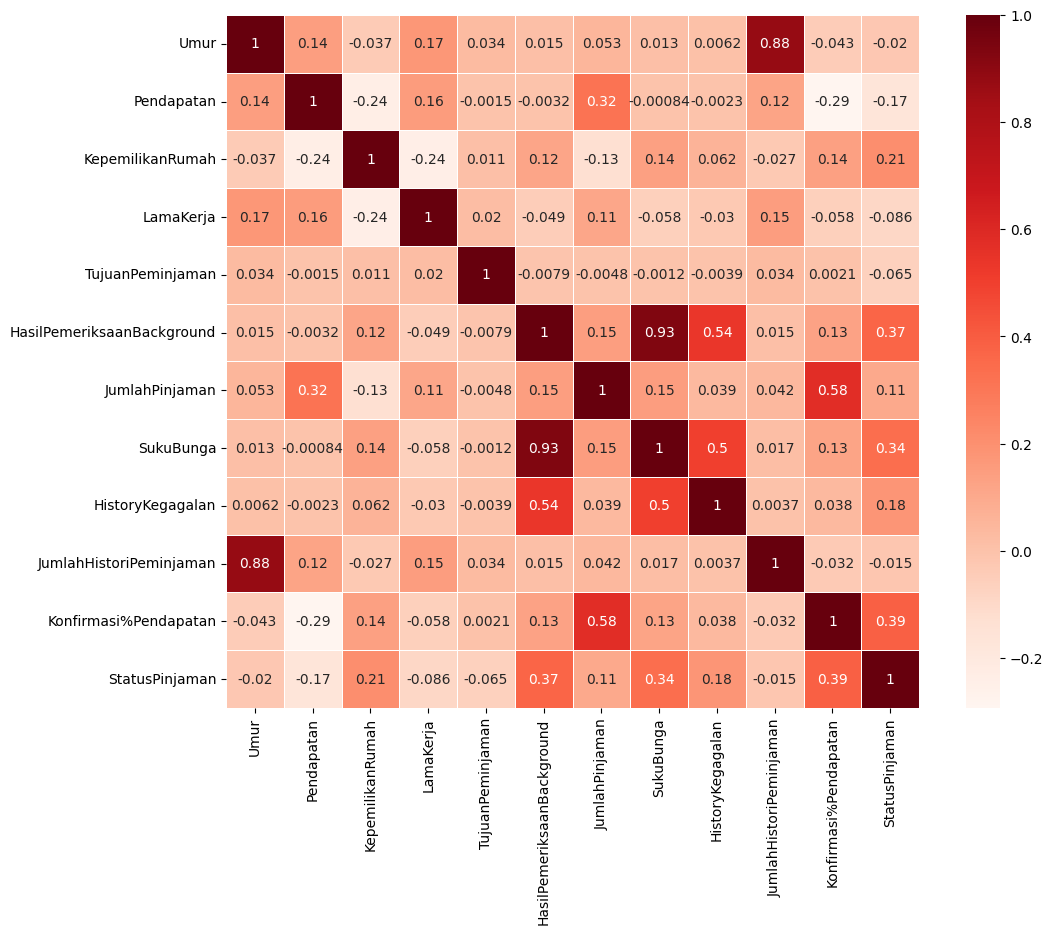

In [ ]:
correlation_matrix = data.corr()

fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,annot=True,square=True, linewidths=.5,cmap=plt.cm.Reds)
plt.show()

In [ ]:
data.isnull().sum()

Umur                             0
Pendapatan                       0
KepemilikanRumah                 0
LamaKerja                      894
TujuanPeminjaman                 0
HasilPemeriksaanBackground       0
JumlahPinjaman                   0
SukuBunga                     3110
HistoryKegagalan                 0
JumlahHistoriPeminjaman          0
Konfirmasi%Pendapatan            0
StatusPinjaman                   0
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
data_imputed = pd.DataFrame(imputer.fit_transform(data),
                            columns=data.columns)

data_imputed.isnull().sum()

Umur                          0
Pendapatan                    0
KepemilikanRumah              0
LamaKerja                     0
TujuanPeminjaman              0
HasilPemeriksaanBackground    0
JumlahPinjaman                0
SukuBunga                     0
HistoryKegagalan              0
JumlahHistoriPeminjaman       0
Konfirmasi%Pendapatan         0
StatusPinjaman                0
dtype: int64

## Feature Engineering

In [ ]:
x = data_imputed.drop(columns='StatusPinjaman')
y = data_imputed['StatusPinjaman']

In [ ]:
# over = SMOTE(random_state=42)

# over = BorderlineSMOTE(random_state=42)

# over = ADASYN(random_state=42)



# categorical_features = [2, 4, 8]
# over = SMOTENC(categorical_features=categorical_features, k_neighbors=5, random_state=42)



In [ ]:
from imblearn.over_sampling import RandomOverSampler

over = RandomOverSampler(random_state=42)
over_x, over_y = over.fit_resample(x, y)

data_over = pd.concat([over_x, over_y], axis=1)
data_over.shape

(50858, 12)

In [ ]:
cetagoricaldata = data_over[['KepemilikanRumah', 'TujuanPeminjaman', 'HistoryKegagalan', 'StatusPinjaman']]

for column in cetagoricaldata:
  value_counts = cetagoricaldata[column].value_counts()
  print(f'Jumlah di kolom {column}:')
  print(value_counts)
  print('\n')

Jumlah di kolom KepemilikanRumah:
4.0    29744
1.0    17833
3.0     3085
2.0      196
Name: KepemilikanRumah, dtype: int64


Jumlah di kolom TujuanPeminjaman:
4.0    10224
2.0     9319
1.0     9040
5.0     8342
6.0     7935
3.0     5998
Name: TujuanPeminjaman, dtype: int64


Jumlah di kolom HistoryKegagalan:
1.0    39563
2.0    11295
Name: HistoryKegagalan, dtype: int64


Jumlah di kolom StatusPinjaman:
0.0    25429
1.0    25429
Name: StatusPinjaman, dtype: int64




In [ ]:
norm_cols = ['Umur','Pendapatan','LamaKerja',
             'JumlahPinjaman','SukuBunga']

scaler = RobustScaler()
data_over[norm_cols] = scaler.fit_transform(data_over[norm_cols])

data_over.head()

,Umur,Pendapatan,KepemilikanRumah,LamaKerja,TujuanPeminjaman,HasilPemeriksaanBackground,JumlahPinjaman,SukuBunga,HistoryKegagalan,JumlahHistoriPeminjaman,Konfirmasi%Pendapatan,StatusPinjaman
0,-0.714286,-1.049351,3.0,0.2,2.0,2.0,-0.833333,-0.110769,1.0,2.0,0.104167,0.0
1,-0.142857,-1.049351,1.0,-0.6,4.0,3.0,-0.333333,0.225425,1.0,3.0,0.572917,1.0
2,-0.428571,0.402597,4.0,0.0,4.0,3.0,2.944444,0.684049,1.0,2.0,0.534351,1.0
3,-0.285714,0.114286,4.0,0.8,4.0,3.0,2.944444,0.497490,2.0,4.0,0.643382,1.0
4,-0.714286,-1.041558,3.0,-0.4,6.0,1.0,-0.666667,-0.888097,1.0,2.0,0.252525,1.0


In [ ]:
data_over.shape

(50858, 12)